# Lab11: Clustering
## Mehmet Gönen
### May 13, 2022

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial as spa

## Data Generation

In [2]:
np.random.seed(421)
# sample size
N = 500

# generate random samples
X1 = np.random.multivariate_normal(np.array([+2.0, +2.0]),
                                   np.array([[0.4, 0.0],
                                             [0.0, 0.4]]), N // 4)
X2 = np.random.multivariate_normal(np.array([-2.0, +2.0]),
                                   np.array([[0.4, 0.0],
                                             [0.0, 0.4]]), N // 4)
X3 = np.random.multivariate_normal(np.array([+2.0, -2.0]),
                                   np.array([[0.4, 0.0],
                                             [0.0, 0.4]]), N // 4)
X4 = np.random.multivariate_normal(np.array([-2.0, -2.0]),
                                   np.array([[0.4, 0.0],
                                             [0.0, 0.4]]), N // 4)
X = np.vstack((X1, X2, X3, X4))

## Parameters

In [3]:
np.random.seed(421)
# cluster count
K = 4

## Algorithm Steps

In [4]:
def update_centroids(memberships, X):
    if memberships is None:
        # initialize centroids
        centroids = X[np.random.choice(range(N), K, False),:]
    else:
        # update centroids
        centroids = np.vstack([np.mean(X[memberships == k,:], axis = 0) for k in range(K)])
    return(centroids)

def update_memberships(centroids, X):
    # calculate distances between centroids and data points
    D = spa.distance_matrix(centroids, X)
    # find the nearest centroid for each data point
    memberships = np.argmin(D, axis = 0)
    return(memberships)

## Visualization

In [5]:
def plot_current_state(centroids, memberships, X):
    cluster_colors = np.array(["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a", "#b15928",
                               "#a6cee3", "#b2df8a", "#fb9a99", "#fdbf6f", "#cab2d6", "#ffff99"])
    if memberships is None:
        plt.plot(X[:,0], X[:,1], ".", markersize = 10, color = "black")
    else:
        for c in range(K):
            plt.plot(X[memberships == c, 0], X[memberships == c, 1], ".", markersize = 10,
                     color = cluster_colors[c])
    for c in range(K):
        plt.plot(centroids[c, 0], centroids[c, 1], "s", markersize = 12, 
                 markerfacecolor = cluster_colors[c], markeredgecolor = "black")
    plt.xlabel("x1")
    plt.ylabel("x2")

## Iterations

Iteration#1:


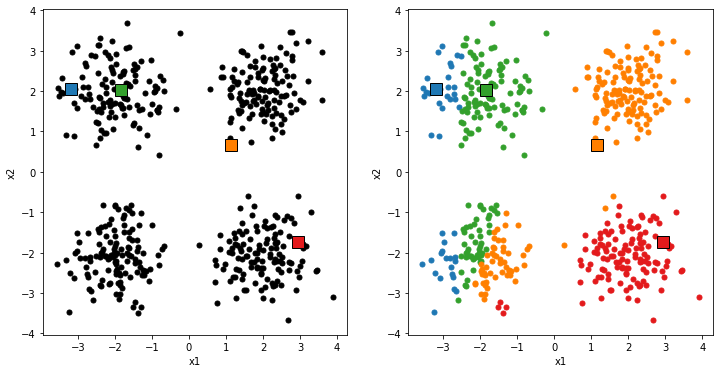

Iteration#2:


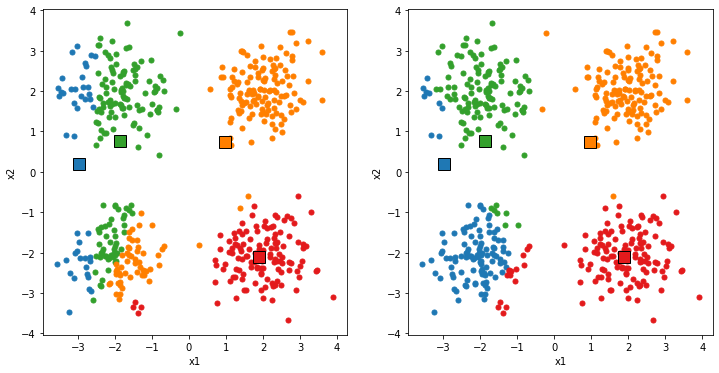

Iteration#3:


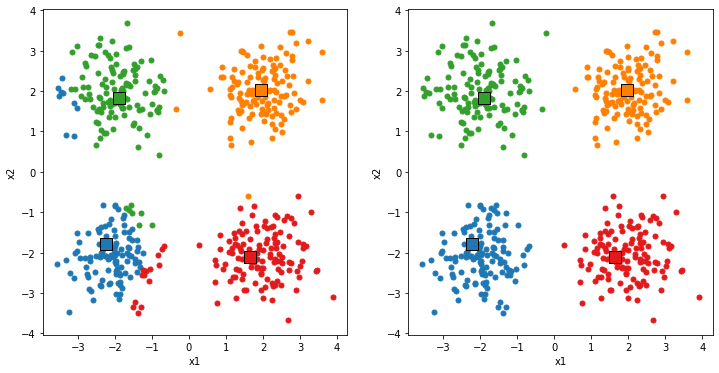

Iteration#4:


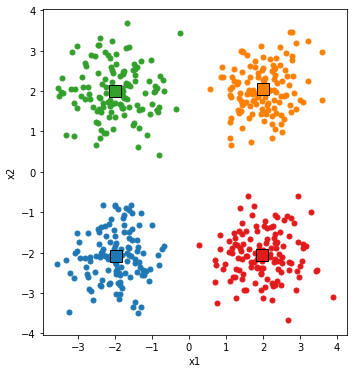

In [6]:
centroids = None
memberships = None
iteration = 1
while True:
    print("Iteration#{}:".format(iteration))

    old_centroids = centroids
    centroids = update_centroids(memberships, X)
    if np.alltrue(centroids == old_centroids):
        break
    else:
        plt.figure(figsize = (12, 6))    
        plt.subplot(1, 2, 1)
        plot_current_state(centroids, memberships, X)

    old_memberships = memberships
    memberships = update_memberships(centroids, X)
    if np.alltrue(memberships == old_memberships):
        plt.show()
        break
    else:
        plt.subplot(1, 2, 2)
        plot_current_state(centroids, memberships, X)
        plt.show()

    iteration = iteration + 1